In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

print("="*70)
print("GOOGLE PLAY STORE DATA ANALYSIS - COMPLETE NOTEBOOK")
print("="*70)

GOOGLE PLAY STORE DATA ANALYSIS - COMPLETE NOTEBOOK


In [2]:
print("\nDAY 1️⃣ : DATA CLEANING STARTED...\n")
data_path = r"D:\1Projects\cleaned_playstore.csv"  

try:
    df = pd.read_csv(data_path)
    print(f"✅ Dataset loaded successfully from {data_path}")
except Exception as e:
    print(f"⚠ Failed to load dataset: {e}")


DAY 1️⃣ : DATA CLEANING STARTED...

✅ Dataset loaded successfully from D:\1Projects\cleaned_playstore.csv


In [3]:
print("\n🔍 Dataset Info:")
print(df.info())


🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
 13  isPaid          10357 non-null  int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 1.1+ MB
None


In [4]:
print("\n📊 Basic Stats:")
print(df.describe())


📊 Basic Stats:
             Rating       Reviews      Installs         Price        isPaid
count  10357.000000  1.035700e+04  1.035700e+04  10357.000000  10357.000000
mean       4.188649  4.059046e+05  1.415776e+07      1.030800      0.073863
std        0.484023  2.696778e+06  8.023955e+07     16.278625      0.261561
min        1.000000  0.000000e+00  0.000000e+00      0.000000      0.000000
25%        4.100000  3.200000e+01  1.000000e+03      0.000000      0.000000
50%        4.200000  1.680000e+03  1.000000e+05      0.000000      0.000000
75%        4.500000  4.641600e+04  1.000000e+06      0.000000      0.000000
max        5.000000  7.815831e+07  1.000000e+09    400.000000      1.000000


In [5]:
print("\n📈 Missing Values:")
print(df.isnull().sum())


📈 Missing Values:
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
isPaid            0
dtype: int64


In [9]:
print(f"\n🔄 Duplicate Rows: {df.duplicated().sum()}")

print("\n🧹 Cleaning missing values...")
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)
df['Content Rating'].fillna(df['Content Rating'].mode()[0], inplace=True)
df['Current Ver'].fillna('Unknown', inplace=True)
df['Android Ver'].fillna('Unknown', inplace=True)

df.drop_duplicates(subset='App', inplace=True)

print("\n🔧 Cleaning numeric/text columns...")
df['Installs'] = df['Installs'].replace('[+,]', '', regex=True).astype(float)
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

def size_to_mb(size):
    if 'M' in str(size):
        return float(size.replace('M', ''))
    elif 'k' in str(size):
        return float(size.replace('k', ''))/1024
    else:
        return np.nan
df['Size'] = df['Size'].apply(size_to_mb)

df = df[df['Rating'] <= 5]
df = df[df['Price'] >= 0]
df.dropna(subset=['Rating','Type','Category'], inplace=True)

df['isPaid'] = df['Type'].apply(lambda x: 1 if x=='Paid' else 0)

num_cols = ['Rating','Reviews','Installs','Price']
df[num_cols] = df[num_cols].astype(float)


🔄 Duplicate Rows: 0

🧹 Cleaning missing values...

🔧 Cleaning numeric/text columns...


In [11]:
print("\n✅ Data cleaning complete!")
print(df.info())

clean_path = "cleaned_playstore.csv"
df.to_csv(clean_path, index=False)
print(f"💾 Cleaned dataset saved as '{clean_path}'")


✅ Data cleaning complete!
<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10356
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            0 non-null      float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
 13  isPaid          9659 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB
None
💾 Cleaned dataset saved as 'cleaned_playstore.csv'



DAY 2️⃣ : EXPLORATORY DATA ANALYSIS STARTED...



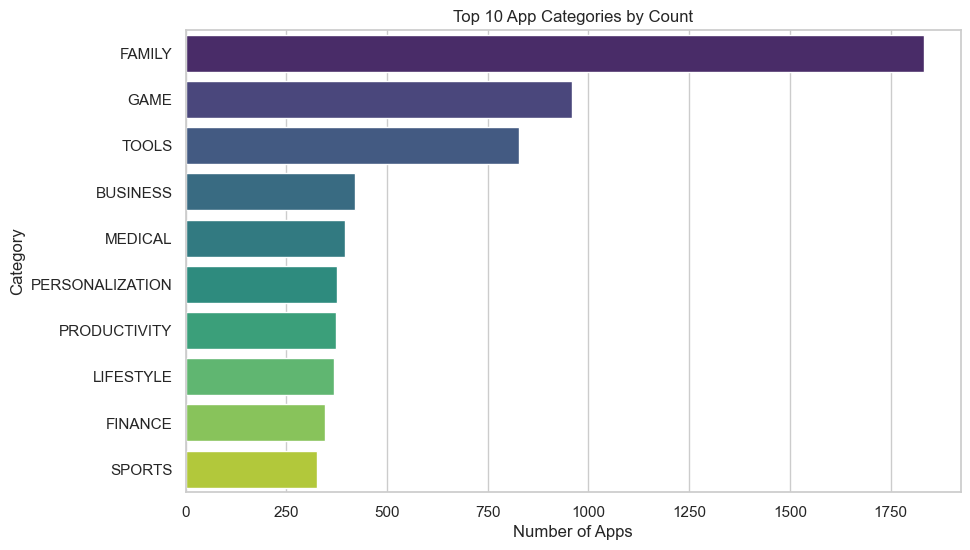

💡 Most popular category: FAMILY (1832 apps)


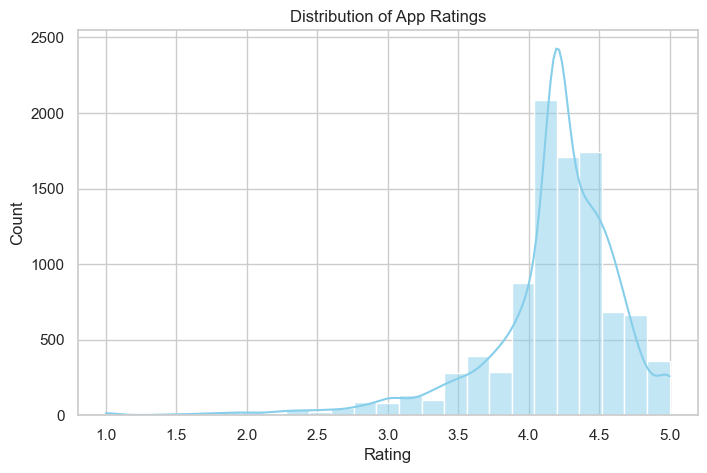

⭐ Average Rating: 4.18


In [16]:
print("\nDAY 2️⃣ : EXPLORATORY DATA ANALYSIS STARTED...\n")

top_cats = df['Category'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_cats.values, y=top_cats.index, palette='viridis')
plt.title('Top 10 App Categories by Count')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()
print(f"💡 Most popular category: {top_cats.index[0]} ({top_cats.iloc[0]} apps)")

plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=25, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.show()
print(f"⭐ Average Rating: {df['Rating'].mean():.2f}")

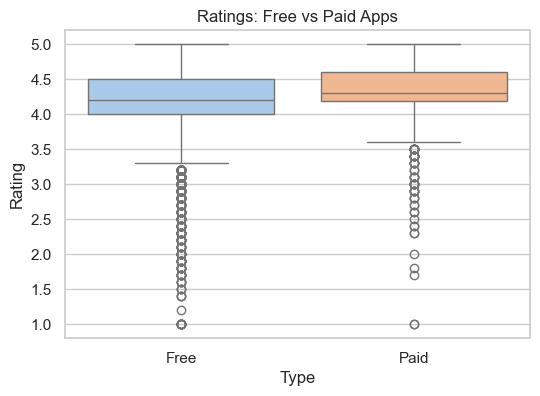

💡 Paid Apps Avg Rating: 4.25 | Free Apps Avg Rating: 4.17


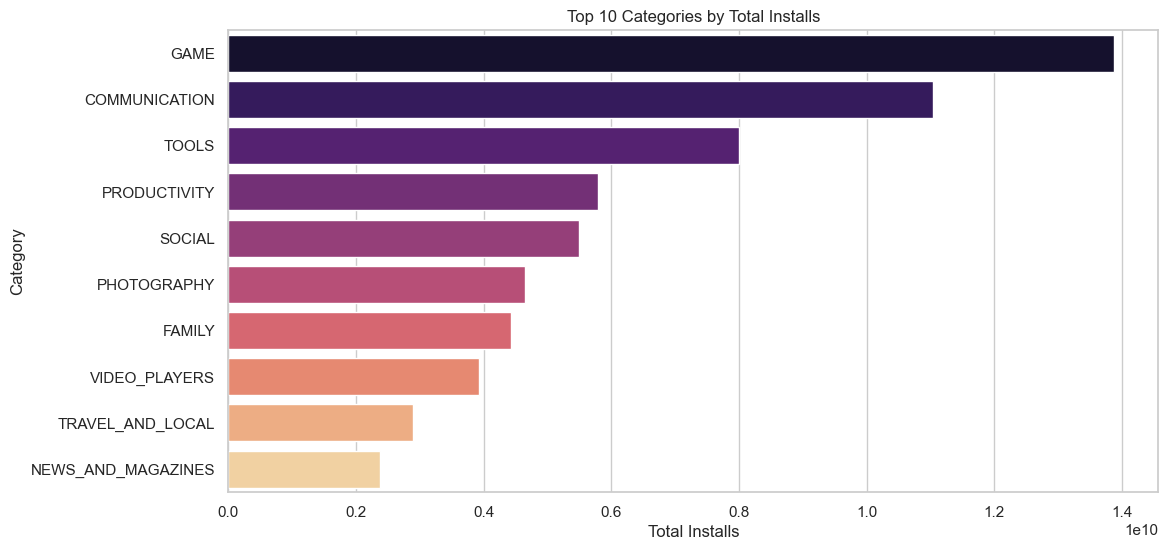

💡 Communication, Social, and Tools apps dominate total installs.


In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Type', y='Rating', data=df, palette='pastel')
plt.title('Ratings: Free vs Paid Apps')
plt.show()
free_avg = df[df['isPaid']==0]['Rating'].mean()
paid_avg = df[df['isPaid']==1]['Rating'].mean()
print(f"💡 Paid Apps Avg Rating: {paid_avg:.2f} | Free Apps Avg Rating: {free_avg:.2f}")

installs_by_cat = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=installs_by_cat.values, y=installs_by_cat.index, palette='magma')
plt.title('Top 10 Categories by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.show()
print("💡 Communication, Social, and Tools apps dominate total installs.")

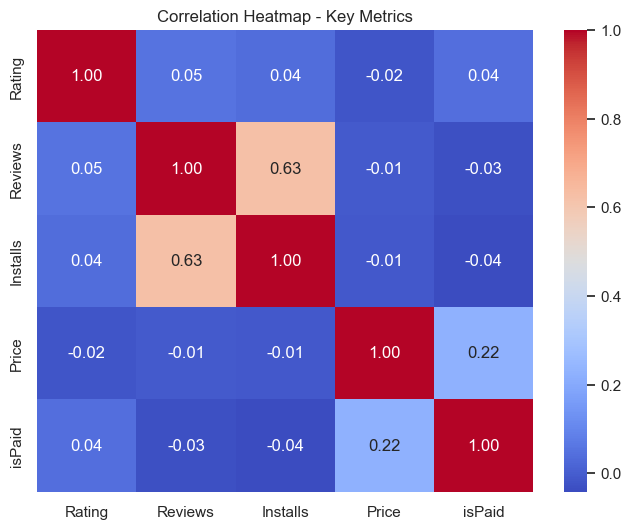

💡 Reviews ↔ Installs show strongest correlation.


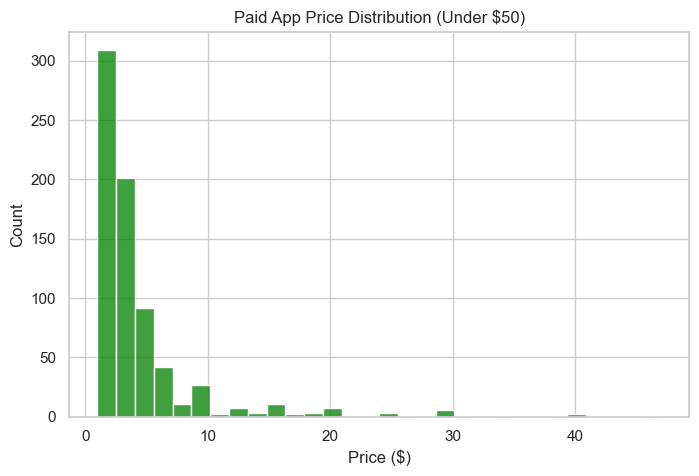

💰 Average Paid App Price: $14.05


In [18]:
corr = df[['Rating','Reviews','Installs','Price','isPaid']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Key Metrics')
plt.show()
print("💡 Reviews ↔ Installs show strongest correlation.")

paid_df = df[df['isPaid']==1]
plt.figure(figsize=(8,5))
sns.histplot(paid_df[paid_df['Price']<50]['Price'], bins=30, color='green')
plt.title('Paid App Price Distribution (Under $50)')
plt.xlabel('Price ($)')
plt.show()
print(f"💰 Average Paid App Price: ${paid_df['Price'].mean():.2f}")


DAY 2️⃣ : ADVANCED FEATURE ENGINEERING & VISUALIZATION

✅ Log transformation applied to 'Installs' for skewed distribution.


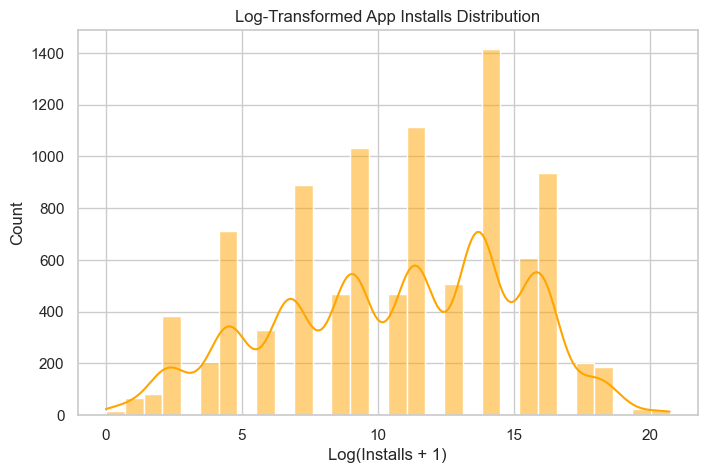

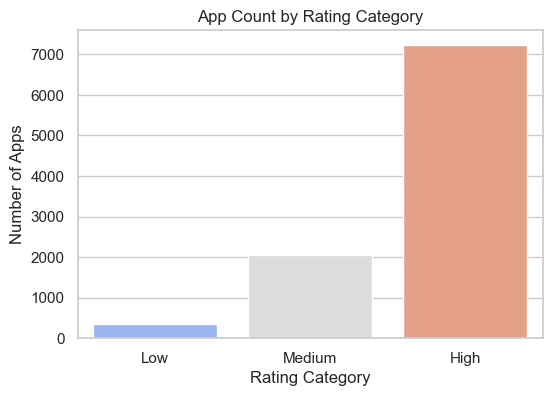

💡 Apps categorized into 'Low', 'Medium', 'High' based on ratings.


In [19]:
print("\nDAY 2️⃣ : ADVANCED FEATURE ENGINEERING & VISUALIZATION\n")

df['log_installs'] = np.log1p(df['Installs'])
print("✅ Log transformation applied to 'Installs' for skewed distribution.")
plt.figure(figsize=(8,5))
sns.histplot(df['log_installs'], bins=30, kde=True, color='orange')
plt.title('Log-Transformed App Installs Distribution')
plt.xlabel('Log(Installs + 1)')
plt.show()

df['rating_category'] = pd.cut(df['Rating'], bins=[0, 3, 4, 5], labels=['Low', 'Medium', 'High'])
rating_counts = df['rating_category'].value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.title('App Count by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Number of Apps')
plt.show()
print("💡 Apps categorized into 'Low', 'Medium', 'High' based on ratings.")

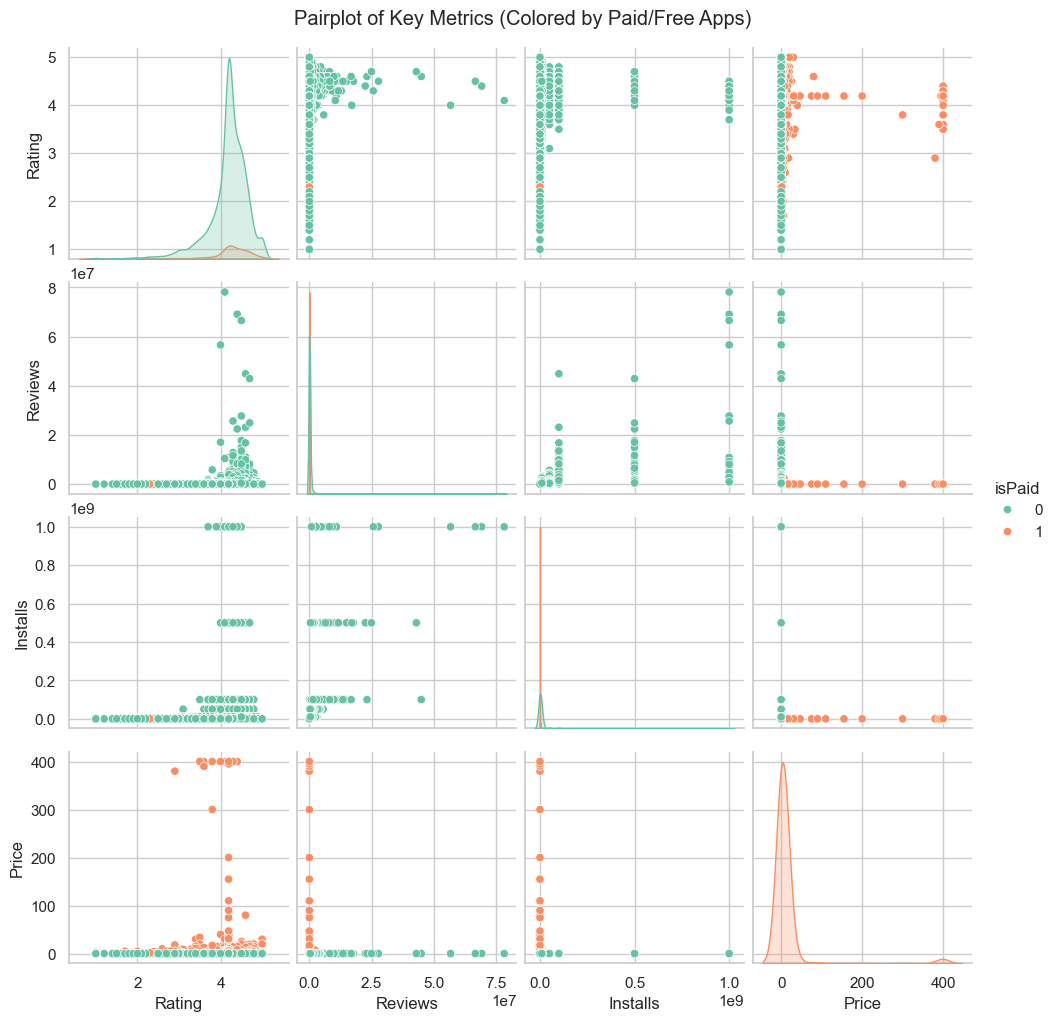

✅ Pairplot created to visualize relationships between key metrics.


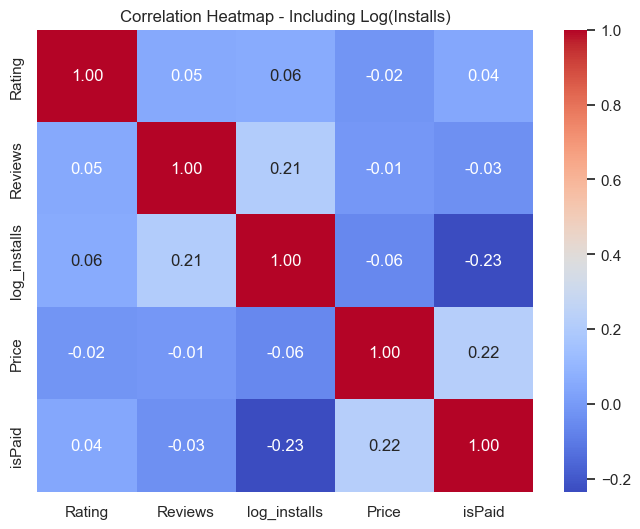

💡 Correlation heatmap updated with log-transformed installs for better insight.


In [20]:
key_metrics = ['Rating', 'Reviews', 'Installs', 'Price', 'isPaid']
sns.pairplot(df[key_metrics], hue='isPaid', palette='Set2', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Key Metrics (Colored by Paid/Free Apps)', y=1.02)
plt.show()
print("✅ Pairplot created to visualize relationships between key metrics.")

corr_log = df[['Rating', 'Reviews', 'log_installs', 'Price', 'isPaid']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_log, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Including Log(Installs)')
plt.show()
print("💡 Correlation heatmap updated with log-transformed installs for better insight.")

In [21]:
print("\n📊 FINAL INSIGHTS SUMMARY")
print("="*60)
print(f"""
1️⃣ CATEGORY INSIGHTS:
   • Most Popular Category: {top_cats.index[0]} ({top_cats.iloc[0]} apps)

2️⃣ RATING INSIGHTS:
   • Average Rating: {df['Rating'].mean():.2f}
   • {'Paid' if paid_avg>free_avg else 'Free'} apps have slightly higher ratings.

3️⃣ INSTALL INSIGHTS:
   • High installs correlate with reviews (r={corr.loc['Reviews','Installs']:.2f})
   • Communication & Social apps dominate installs.

4️⃣ PRICING INSIGHTS:
   • Total Paid Apps: {len(paid_df):,} ({len(paid_df)/len(df)*100:.1f}%)
   • Average Price: ${paid_df['Price'].mean():.2f}
   • Price has weak correlation with rating (r={corr.loc['Price','Rating']:.2f})

5️⃣ FEATURE ENGINEERING:
   • Log-transformed installs added for skewed data analysis.
   • Apps categorized by rating: Low, Medium, High.
""")
print("="*60)
print("✅ EDA & Advanced Feature Engineering COMPLETE! Upload cleaned_playstore.csv to Power BI for dashboard.")


📊 FINAL INSIGHTS SUMMARY

1️⃣ CATEGORY INSIGHTS:
   • Most Popular Category: FAMILY (1832 apps)

2️⃣ RATING INSIGHTS:
   • Average Rating: 4.18
   • Paid apps have slightly higher ratings.

3️⃣ INSTALL INSIGHTS:
   • High installs correlate with reviews (r=0.63)
   • Communication & Social apps dominate installs.

4️⃣ PRICING INSIGHTS:
   • Total Paid Apps: 756 (7.8%)
   • Average Price: $14.05
   • Price has weak correlation with rating (r=-0.02)

5️⃣ FEATURE ENGINEERING:
   • Log-transformed installs added for skewed data analysis.
   • Apps categorized by rating: Low, Medium, High.

✅ EDA & Advanced Feature Engineering COMPLETE! Upload cleaned_playstore.csv to Power BI for dashboard.
